In [26]:
import sys
sys.path.append("..")

from utils.model3 import Net_mask
#from utils.model4 import Net_mask
import torch

import matplotlib.pyplot as plt

In [27]:
test_obses = torch.load('../data/test_observations/all_test_observations.pt')
test_solutions = torch.load('../data/test_observations/all_test_solutions.pt')

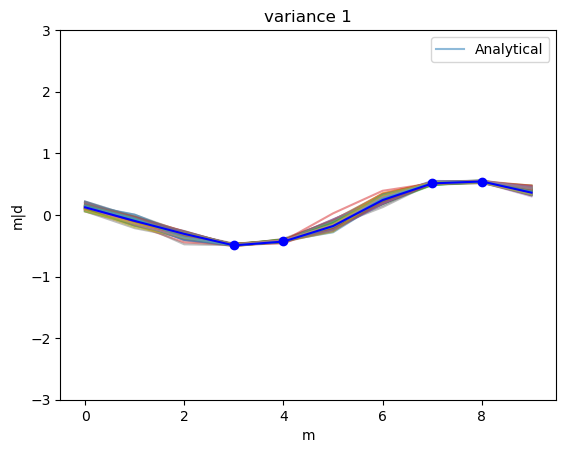

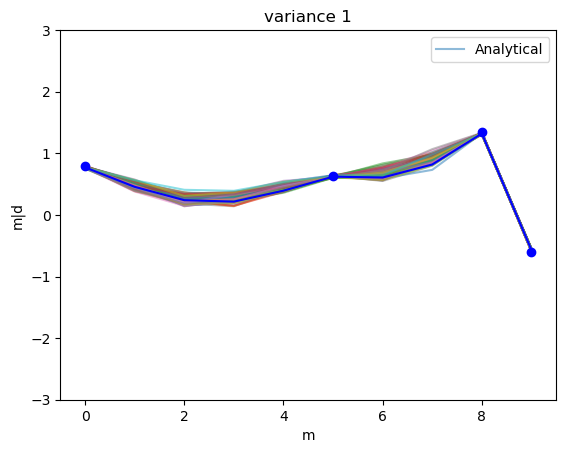

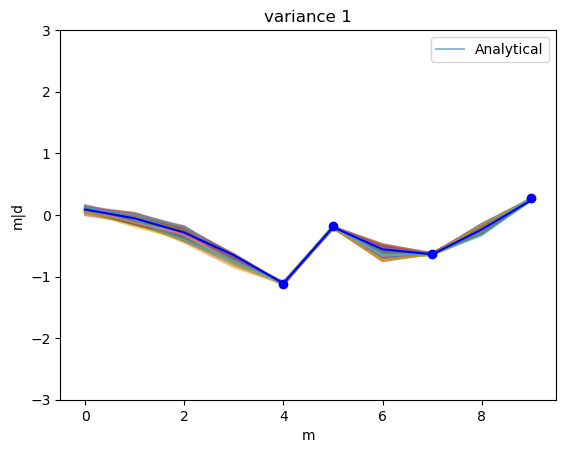

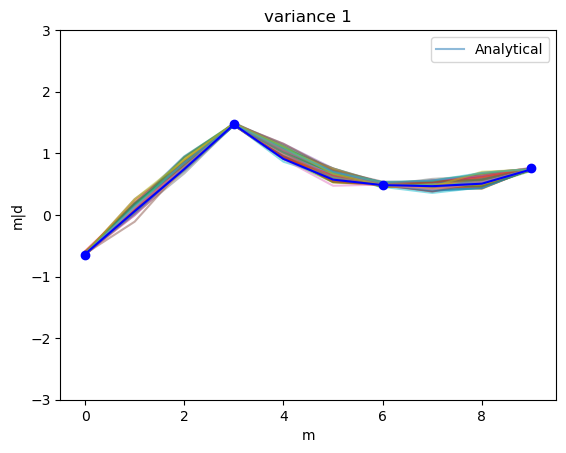

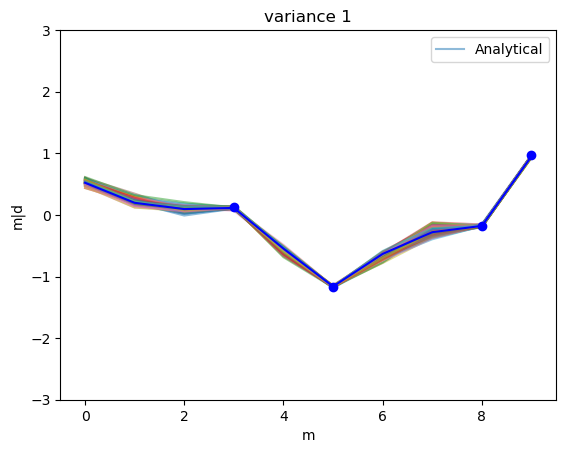

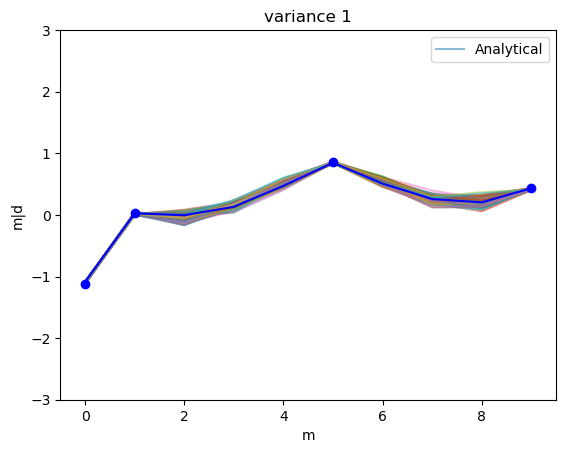

In [29]:
n_points = 4
model2 = Net_mask()
model2.load_state_dict(torch.load(f'../saved_models/model_infinite/1/model_weights.pth'))
for example in range(6): 
    num = int(f'{n_points}{example}')
    tensor_raw = test_obses[num,:].unsqueeze(0)
    post_mean = test_solutions[num,:]
    n_param = 10
    input_tensor = tensor_raw[0]
    mask = input_tensor[10:]
    location_raw = torch.where(mask > 0.5)
    location = location_raw[0]
    points = tensor_raw[0][location_raw]
    #post_mean, _ = data_generator.get_tensor_posterior(input_tensor)

    out_map = model2(tensor_raw)
    out_map = out_map[0].detach().numpy()

    # Plotting model estimates
    model = Net_mask()

    #names = []
    sum_tensor_map = torch.zeros(n_param)

    n_runs = 100
    plt.figure()
    #plt.plot(range(10), post_mean, 'b')
    sum_tensor_bnn = torch.zeros(n_param)
    #plt.subplot(1,2,1)
    for f in range(n_runs): 
        name = f'../saved_models/rml_100/pos/{f}/model_weights.pth'
        model.load_state_dict(torch.load(name))
        model.eval()
        out_raw = model(tensor_raw)
        out = out_raw[0].detach()
        sum_tensor_bnn += out
        plt.plot(range(10), out, alpha=0.5)#, 'o')
    #plt.plot(range(10), sum_tensor_bnn/10, 'r')

    plt.title('variance 1')
    #plt.plot(range(10), post_mean, 'r')
    plt.plot(range(10), out_map, 'b')
    plt.plot(location, points, 'bo')
    plt.xlabel("m")
    plt.ylabel("m|d")
    plt.legend(['Analytical'])#, 'Bagged BNN', 'MAP'])
    plt.axis([-0.5, 9.5, -3, 3])


    #plt.subplot(1,2,2)
    #for f in range(n_runs): 
    #    name = '../saved_models/map_test_var_30/map/' + str(f) + '/' + 'model_weights.pth'
    #    model.load_state_dict(torch.load(name))
    #    model.eval()
    #    out_raw = model(tensor_raw)
    #    out = out_raw[0].detach()
    #    sum_tensor_bnn += out
    #    plt.plot(range(10), out, alpha=1)#, 'o')

    #plt.title('var 30')
    #plt.plot(range(10), post_mean, 'b')
    #plt.plot(location, points, 'bo')
    #plt.xlabel("m")
    #plt.ylabel("m|d")
    #plt.legend(['Analytical'])#, 'Bagged BNN', 'MAP'])
    #plt.axis([-0.5, 9.5, -3, 3])
    #plt.savefig('../figures/fig.png') 